In [1]:
import numpy as np
import cv2
import pandas as pd

#img = cv2.imread('BSE_Image.jpg')
img = cv2.imread("C:/Users/RAZER/Downloads/dataset/sandstone_data_for_ML/sandstone_data_for_ML/partial_labels_for_traditional_ML/sandstone_train_images.tif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [2]:
df = pd.DataFrame()

In [3]:
#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df['Original Image'] = img2

In [4]:
img2.shape

(1019904,)

#Gabor Filters (32 features)

In [5]:
#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [6]:
df

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor23,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#converting 3d to 2d np array

#More Filters

In [7]:
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe

from skimage.filters import roberts, sobel, scharr, prewitt

#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe



In [8]:
df

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Gabor32,Canny Edge,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3,Variance s3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0,0,0,0


In [9]:
#Now, add a column in the data frame for the Labels
#For this, we need to import the labeled image
labeled_img = cv2.imread("C:/Users/RAZER/Downloads/dataset/sandstone_data_for_ML/sandstone_data_for_ML/partial_labels_for_traditional_ML/sandstone_partial_labels_from_APEER_ML.tif")
#Remember that you can load an image with partial labels 
#But, drop the rows with unlabeled data

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1

In [10]:
df

,Original Image,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,...,Canny Edge,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3,Variance s3,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019899,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
1019900,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
1019901,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0
1019902,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [11]:

#Define the dependent variable that needs to be predicted (labels)
Y = df["Labels"].values

#Define the independent variables
X = df.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)



In [12]:
# Import the model we are using
#RandomForestRegressor is for regression type of problems. 
#For classification we use RandomForestClassifier.
#Both yield similar results except for regressor the result is float
#and for classifier it is an integer. 

from sklearn.ensemble import RandomForestClassifier
# Instantiate model with n number of decision trees
model = RandomForestClassifier(n_estimators = 100, random_state = 42)


In [13]:
###
#SVM
# Train the Linear SVM to compare against Random Forest
#SVM will be slower than Random Forest. 
#Make sure to comment out Fetaure importances lines of code as it does not apply to SVM.
#from sklearn.svm import LinearSVC
#model = LinearSVC(max_iter=100)  #Default of 100 is not converging





# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# verify number of trees used. If not defined above. 
#print('Number of Trees used : ', model.n_estimators)

#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE
#First test prediction on the training data itself. SHould be good. 
prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)


In [15]:
#Let us check the accuracy on test data
from sklearn import metrics
#Print the prediction accuracy

#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy on training data =  0.9963525955074174
Accuracy =  0.9311553527044185


In [16]:
#This part commented out for SVM testing. Uncomment for random forest. 
#One amazing feature of Random forest is that it provides us info on feature importances
# Get numerical feature importances
#importances = list(model.feature_importances_)

#Let us print them into a nice format.

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)


Gaussian s7       0.077335
Gaussian s3       0.061337
Scharr            0.059884
Prewitt           0.059334
Roberts           0.056460
Sobel             0.056052
Variance s3       0.051885
Median s3         0.051762
Original Image    0.042810
Gabor31           0.042139
Gabor32           0.038831
Gabor29           0.036637
Gabor23           0.036574
Gabor21           0.035868
Gabor6            0.032975
Gabor5            0.030753
Gabor24           0.028922
Gabor30           0.026165
Gabor7            0.024277
Gabor4            0.023392
Gabor8            0.023259
Gabor12           0.020060
Gabor11           0.019275
Gabor3            0.018034
Gabor20           0.013342
Gabor28           0.011919
Gabor27           0.007502
Gabor19           0.006658
Gabor22           0.004242
Canny Edge        0.002317
Gabor2            0.000000
Gabor9            0.000000
Gabor26           0.000000
Gabor10           0.000000
Gabor1            0.000000
Gabor18           0.000000
Gabor17           0.000000
G

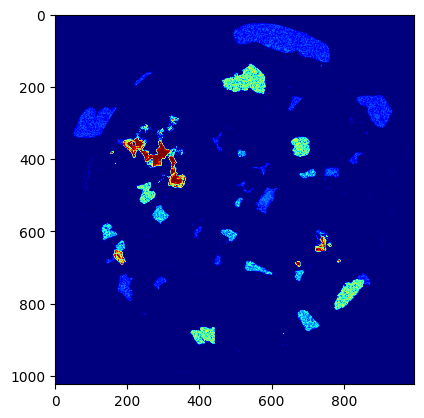

In [17]:
import pickle

#Save the trained model as pickle string to disk for future use
filename = "sandstone_model"
pickle.dump(model, open(filename, 'wb'))

#To test the model on future datasets
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(X)

segmented = result.reshape((img.shape))

from matplotlib import pyplot as plt
plt.imshow(segmented, cmap ='jet')
plt.imsave('segmented_rock_RF_100_estim.jpg', segmented, cmap ='jet')